In [ ]:
#OK

In [3]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram



using DifferentialEquations
using Plots
using CSV
using DataFrames
using LookupTable
using .JuliaMBD
using .JuliaMBD.Diagram

In [4]:
@model rd_pnt begin
    df = CSV.read("road_surface.csv", DataFrame)
    @parameter begin
        kmph2mps = 0.27778
        I_wheelbase=41
        vel_car_kmph=42
        end_of_road_surface=43
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "2RD_PNT")
end

┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in3", "id" => "g7eCk3r6jItT9pMMCXGj-48", "parent" => "g7eCk3r6jItT9pMMCXGj-44", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/JTVej/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in4", "id" => "g7eCk3r6jItT9pMMCXGj-49", "parent" => "g7eCk3r6jItT9pMMCXGj-44", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/JTVej/src/diagrams/_xml2model.jl:76


rd_pnt (generic function with 1 method)

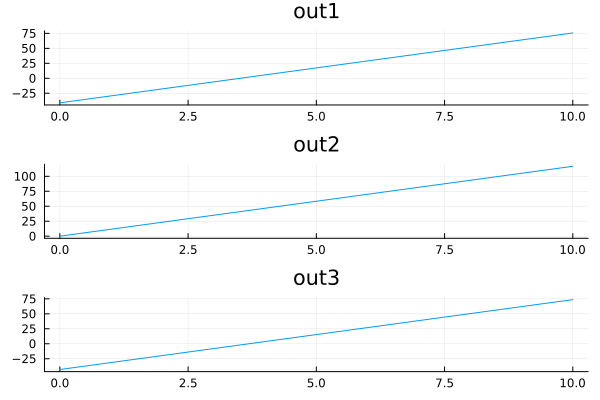

In [5]:
#OneDのy,breaksのdfを変更
@model TestRd_pnt begin
    @block begin
        m = rd_pnt()
    end
    @scope begin
        m.v_RD2TR_R_mps => out1
        m.v_RD2TR_F_mps => out2
        m.outstop => out3
    end
end

m = @compile_derivative TestRd_pnt() #１つでも微分ブロックがあるなら@compile_derivativeを書き足す,この場合はmatlabの結果と異なる場合がある
res = simulate(m, tspan=[0, 10])
plot(res)